In [152]:
import pandas
import seaborn
import sklearn
import functions as covid_lib
from numpy import hstack, array
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


---
## 1st Dataset : John Hopkins Data

In [43]:
## John Hopkins Center for Systems Science and Engineer Data Base URL
## Contains timeseries data
## This set of data is updated daily
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

cumulated_confirmed_url = baseURL + "time_series_covid19_confirmed_global.csv"
cumulated_deaths_url    = baseURL + "time_series_covid19_deaths_global.csv"
cumulated_recovered_url = baseURL + "time_series_covid19_recovered_global.csv"

cumulated_confirmed     = pd.read_csv(cumulated_confirmed_url)
cumulated_deaths        = pd.read_csv(cumulated_deaths_url)
cumulated_recovered     = pd.read_csv(cumulated_recovered_url)

## Processed Dataset
## Combine by Country/Region
cumulated_confirmed_country = covid_lib.df_groupby_countries(cumulated_confirmed)
cumulated_deaths_country = covid_lib.df_groupby_countries(cumulated_deaths)
cumulated_recovered_country = covid_lib.df_groupby_countries(cumulated_recovered)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# US_confirmed.to_csv('cululated_confirmed.csv', index = False)

In [45]:
print("Confirmed data shape : " + str(cumulated_confirmed_country.shape))
print("Recovered data shape : " + str(cumulated_deaths_country.shape))
print("Deaths data shape : " + str(cumulated_recovered_country.shape))

Confirmed data shape : (188, 206)
Recovered data shape : (188, 206)
Deaths data shape : (188, 206)


In [46]:
# ## To find specific instances on certain countries
# ## Consider grouping by countries to simplify the analysis process
# cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()

In [47]:
cumulated_confirmed_country.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,925,937,939,939,944,955,955,955,963,963
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735


In [48]:
unique_countries = cumulated_confirmed_country["Country/Region"].unique()

In [49]:
cumulated_deaths_country[cumulated_deaths_country["Country/Region"]=="Taiwan*"]


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
165,Taiwan*,23.7,121.0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [50]:
## Call this only if you wanna wait forever
proceed = False
if proceed:
    for country in unique_countries:
        covid_lib.plt_all_cases_increase_cases(country, cumulated_confirmed_country  )

In [51]:
# US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
# US_confirmed

# all_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)

### Taiwan Analysis

In [52]:
query_country = "Taiwan*"
query_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]==query_country]
queried_total_cases, queried_increased_case = covid_lib.df_to_timeseries(query_confirmed, 1)
model = SARIMAX(queried_total_cases, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(queried_total_cases), len(queried_total_cases)+10)
print(yhat)
covid_lib.plot_all( queried_total_cases, queried_increased_case, yhat , query_country )

[480.69058649 482.15454437 483.43242074 484.74969023 486.05917286
 487.37013022 488.68081635 489.99155131 491.30227762 492.61300545
 493.92373301]


In [53]:
# TW_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="Taiwan*"].head()
# total_cases, increased_case = covid_lib.df_to_timeseries(TW_confirmed, 7)


### US Analysis

In [54]:
US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
total_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)


<IPython.core.display.Javascript object>

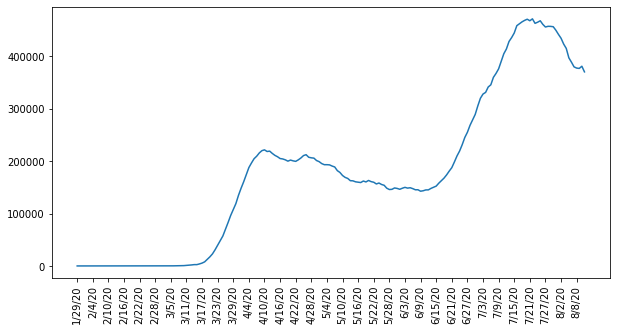

In [55]:
figure = plt.figure(figsize = (10,5))
plt.plot(increased_case)
plt.xticks(np.arange(0, len(increased_case.dropna()), 6)) 
plt.xticks(rotation=90)
plt.savefig("Infected Case.jpg",  bbox_inches='tight')

In [56]:
# covid_lib.plot_all( total_cases, increased_case, yhat , "US" )

---

### Full Model Building

In [67]:
increased_case_14_train = increased_case.iloc[:-14]
increased_case_7_train  = increased_case.iloc[:-7]

increased_case_14_test = increased_case.iloc[-14:]
increased_case_7_test = increased_case.iloc[-7:]

/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Test RMSE: 21.947


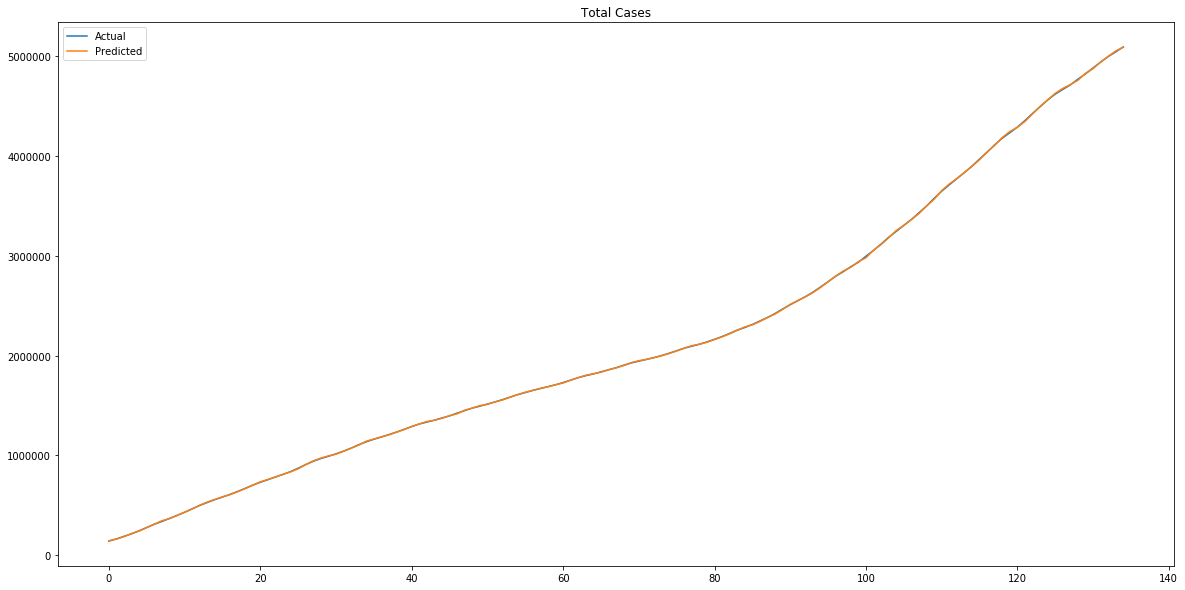

In [16]:
## This only predicts for one day
predictions_total, model_total = covid_lib.SARIMA_PREDICT(total_cases,"Total Cases", order_tuple = (0,1,0), fit_param = (True, True))
# predictions_total, model_total = covid_lib.SARIMA_PREDICT_edit(total_cases,"Total Cases", order_tuple = (0,1,0), fit_param = (True, True))

#### Predict future total Cases

46546.01704515561


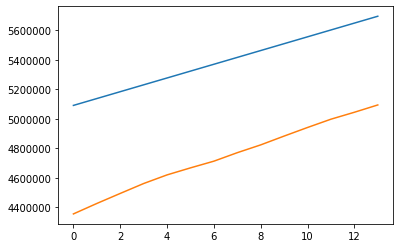

In [17]:
# today and tomorrow
temp = model_total.forecast(14)
plt.plot(temp)
plt.plot(total_cases[-14:])


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(temp, total_cases[-14:])) / len(temp)
print(rmse)

---

#### Count Increase Model Building

/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Test RMSE: 18.536


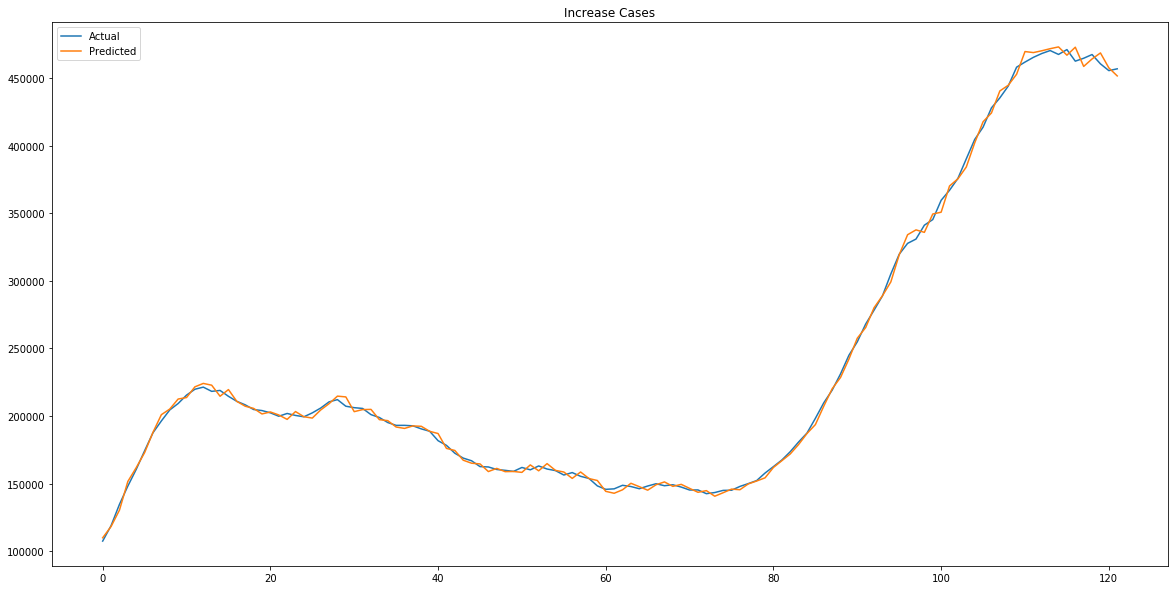

In [81]:
# Prediction for 14 days
increase_temp_14 = increased_case_14_train.values 
predictions_increase, model_increase = covid_lib.SARIMA_PREDICT(increase_temp_14, "Increase Cases",  is_increase_case = True, fit_param = (True,True) )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Last 14 : Prediction vs Actual. RMSE : 3188.4468901084465')

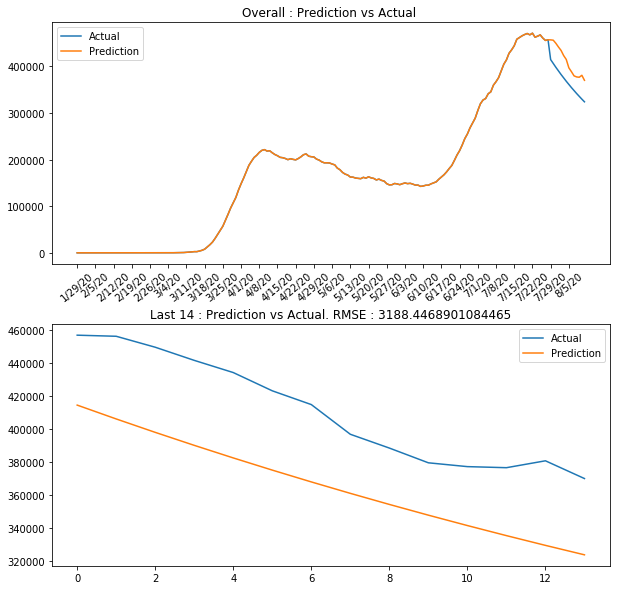

In [159]:
prediction = model_increase.forecast(14)
prediction = prediction.reshape(14, 1)
overall_prediction_14 = np.append(increase_temp_14, prediction)
# temp_l = increase_temp_14.append(temp)

rmse = sqrt(mean_squared_error( increased_case_14_test.values, prediction)) / len(prediction)
rmse

fig = plt.figure(figsize=(10,10)) 
fig.tight_layout()
plt.subplots_adjust(hspace = 0.25)

plt.subplot(2,1,1)
plt.plot(overall_prediction_14)
plt.plot(increased_case)
plt.xticks(np.arange(0, len(overall_prediction_14), 7))  
plt.xticks(rotation = 40)
plt.legend(["Actual", "Prediction"])
plt.title("Overall : Prediction vs Actual ")

plt.subplot(2,1,2)
plt.plot(increased_case_14_test.values)
plt.plot(prediction)
plt.legend(["Actual", "Prediction"])
plt.title("Last 14 : Prediction vs Actual. RMSE : " + str(rmse))

/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Test RMSE: 17.916


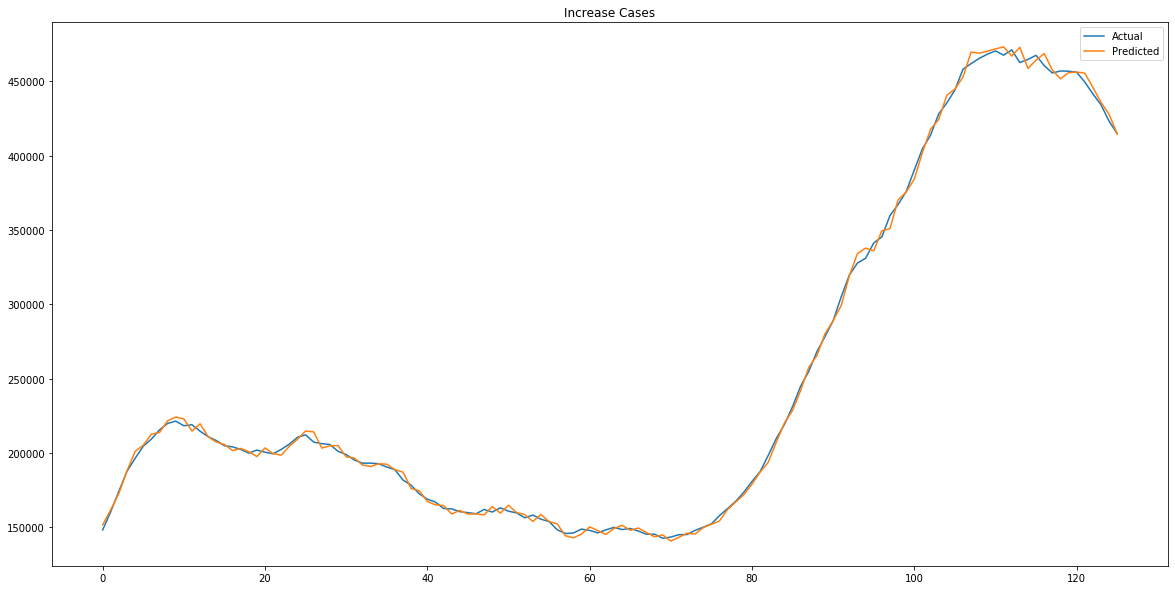

In [151]:
# Prediction for 7 days
increase_temp_7 = increased_case_7_train.values 
predictions_increase, model_increase = covid_lib.SARIMA_PREDICT(increase_temp_7, "Increase Cases",  is_increase_case = True, fit_param = (True,True) )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Last 7 : Prediction vs Actual. RMSE : 1868.6611886176474')

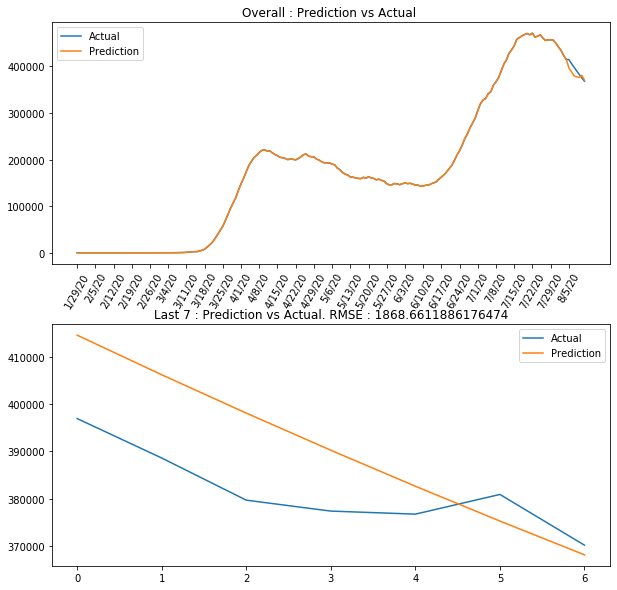

In [162]:
prediction = model_increase.forecast(7)
prediction = prediction.reshape(7, 1)
overall_prediction_7 = np.append(increase_temp_7, prediction)
# temp_l = increase_temp_14.append(temp)

rmse = sqrt(mean_squared_error( increased_case_7_test.values, prediction)) / len(prediction)
rmse

fig = plt.figure(figsize=(10,10))
fig.tight_layout()
plt.subplots_adjust(hspace = 0.25)
plt.subplot(2,1,1)
plt.plot(overall_prediction_7)
plt.plot(increased_case)
plt.xticks(np.arange(0, len(overall_prediction_7), 7))  
plt.xticks(rotation = 60)
plt.legend(["Actual", "Prediction"])
plt.title("Overall : Prediction vs Actual ")

plt.subplot(2,1,2)
plt.plot(increased_case_7_test.values)
plt.plot(prediction)
plt.legend(["Actual", "Prediction"])
plt.title("Last 7 : Prediction vs Actual. RMSE : " + str(rmse))

In [74]:
# # Predicction for 1 day
# increase_temp = increased_case.values 
# predictions_increase, model_increase = covid_lib.SARIMA_PREDICT(increase_temp, "Increase Cases",  is_increase_case = True, fit_param = (True,True) )

In [163]:
# # today and tomorrow
# forecasted_increase = model_increase.forecast(14)
# plt.plot(forecasted_increase)
# plt.plot(increase_temp[-14:])
# plt.legend(["Forecasted" , "Actual"])


# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = sqrt(mean_squared_error(temp, increase_temp[-14:])) / len(temp)
# print(rmse)

In [20]:
# predictions_increase, model_increase = covid_lib.SARIMA_PREDICT_edit(increase_temp, "Increase Cases",  is_increase_case = True, fit_param = (True,True) )

---

### Model 1 test using lstm

In [21]:
############# Modeling for total cases #############
# one_week_feature, one_week_target = covid_lib.split_sequence(total_cases.transpose()[0], 7)
# two_week_feature, two_week_target = covid_lib.split_sequence(total_cases.transpose()[0], 14)

# train_owf, train_owt, test_owf, test_owt = covid_lib.train_test_split_timeseries(one_week_feature, one_week_target)


# covid_lib.LSTM_PREDICT(feature = train_owf,
#      target = train_owt, 
#      test_feature = test_owf,
#      test_target = test_owt ,
#      n_features = 1,
#      n_steps = 7)

############# Modeling for increased cases #############

# one_week_feature, one_week_target = covid_lib.split_sequence(increased_case.values.transpose()[0], 7)
# two_week_feature, two_week_target = covid_lib.split_sequence(increased_case.values.transpose()[0], 14)

# train_owf, train_owt, test_owf, test_owt = covid_lib.train_test_split_timeseries(one_week_feature, one_week_target)


# covid_lib.LSTM_PREDICT(feature = train_owf,
#      target = train_owt, 
#      test_feature = test_owf,
#      test_target = test_owt ,
#      n_features = 1,
#      n_steps = 7)

In [22]:
############# Deprecated Testing Code #############

# np.save("./test files/in_seq1",in_seq1)
# np.save("./test files/in_seq2",in_seq2)
# np.save("./test files/out_seq",out_seq)
# np.save("./test files/test_input",test_input)


# test_input =np.load("./test files/test_input.npy") 
# in_seq1 = np.load("./test files/in_seq1.npy")
# in_seq2 = np.load("./test files/in_seq2.npy")
# out_seq = np.load("./test files/out_seq.npy")

In [23]:
sentiment_value_dataframe = pd.read_csv("../Data/SentimentValues.csv", index_col = [0] )
#  sentiment_value = sentiment_value_dataframe.iloc[:,-4:]
# sentiment_value_dataframe

SentimentValueTitle            = sentiment_value_dataframe.iloc[:,0]
SentimentValueDescription      = sentiment_value_dataframe.iloc[:,1]
SentimentValueTitleVader       = sentiment_value_dataframe.iloc[:,2]
SentimentValueDescriptionVader = sentiment_value_dataframe.iloc[:,3]

<IPython.core.display.Javascript object>

In [24]:
# SentimentValueTitle

In [25]:
# len(SentimentValueTitle)

In [26]:
# len(increased_case)

In [27]:
# SentimentValueTitle
# SentimentValueTitle_seq = SentimentValueTitle.values.reshape(len(SentimentValueTitle),1)

In [28]:
# increased_case.iloc[0:61,0]

In [29]:
# pd.Series(predictions_increase)

In [30]:
predicted_length = int(len(increased_case.values) * 1 / 3)
sarima_prediction = increased_case.iloc[0:predicted_length,0].append(pd.Series(predictions_increase), ignore_index = True)
sarima_prediction_seq_ = sarima_prediction.values.reshape(len(sarima_prediction),1)


<IPython.core.display.Javascript object>

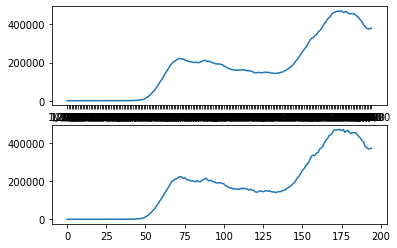

In [31]:
plt.subplot(2,1,1)
plt.plot(increased_case)

plt.subplot(2,1,2)
plt.plot(sarima_prediction)

In [32]:
len(sarima_prediction_seq_)

195

In [33]:
#### Data Preparation
### Predicting increase case

# define input sequence
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1)) 
predicted_length = int(len(increased_case.values) * 1 / 3)
sarima_prediction = increased_case.iloc[0:predicted_length,0].append(pd.Series(predictions_increase), ignore_index = True)

sarima_prediction_seq_ = sarima_prediction.values.reshape(len(sarima_prediction),1)
SentimentValueDescription_seq     = SentimentValueDescription.values.reshape(len(SentimentValueDescription),1)
SentimentValueTitleVader_seq      = SentimentValueTitleVader.values.reshape(len(SentimentValueTitleVader),1)
SentimentValueDescriptionVader_seq= SentimentValueDescriptionVader.values.reshape(len(SentimentValueDescriptionVader),1)
SentimentValueTitle_seq           = SentimentValueTitle.values.reshape(len(SentimentValueTitle),1)
out_seq = increased_case.values.reshape(len(increased_case.values), 1)

# horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
dataset = hstack((
                sarima_prediction_seq_,
                SentimentValueDescription_seq , 
                  SentimentValueTitleVader_seq, 
                  SentimentValueDescriptionVader_seq,
                  SentimentValueTitle_seq,
                  out_seq))
test_input = hstack((
                sarima_prediction_seq_,
                SentimentValueDescription_seq , 
                  SentimentValueTitleVader_seq, 
                  SentimentValueDescriptionVader_seq,
                  SentimentValueTitle_seq))

<IPython.core.display.Javascript object>

In [34]:
# ################### Single Step LSTM ###################
# n_steps = 14
# X, y = covid_lib.split_sequences(dataset, n_steps)
# n_features = X.shape[2] 
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# model.fit(X, y, epochs=200, verbose=0)

# ################### Testing Results ###################

# x_input = test_input[-14:]
# ### reshape : sample count, time step, features
# x_input = x_input.reshape((1, n_steps, n_features))
# # print(x_input)
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

---

In [35]:
################### Multivariate, Multi Timestep LSTM ###################

n_steps_in, n_steps_out = 14, 7
X, y = covid_lib.split_sequences_three(dataset, n_steps_in, n_steps_out)
n_features = X.shape[2] 
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu'))

model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

################### Testing Results ###################

x_input = test_input[-n_steps_in:]
### reshape : sample count, time step, features
x_input = x_input.reshape((1, n_steps_in, n_features))
# print(x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[370583.38 396644.4  395901.34 361759.03 366193.1  387074.2  378022.4 ]]


---

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/mavericku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mavericku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



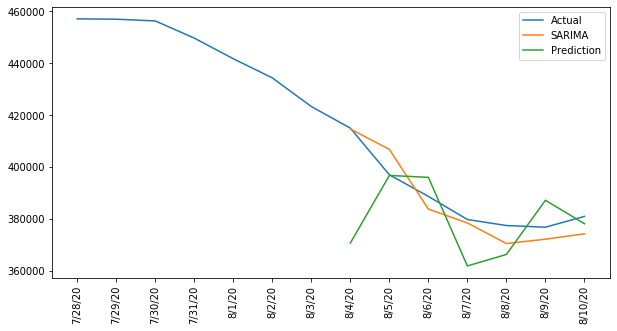

In [36]:
final_graph_df = pd.DataFrame(increased_case)
final_graph_df["SARIMA"] = np.nan
final_graph_df["LSTM"] = np.nan

### Add last 7 predicted values to dataframe
sarima = []
for i in sarima_prediction_seq_[-n_steps_out:].tolist():
    sarima.append(i[0])
    
# sarima_list = sarima_prediction_seq_[-n_steps_out:].tolist()
# for i in range(-n_steps_out, 0):
    
final_graph_df["SARIMA"][-7:] =  np.array(sarima)
final_graph_df["LSTM"][-7:] = yhat[0]

### Check 
final_graph_df[-14:]


### Plot

plt.figure(figsize=(10,5))
plt.plot(final_graph_df[-14:])
# plt.plot(increased_case[-n_steps_out:])
# plt.plot(yhat[0])
# plt.plot(sarima_prediction_seq_[-n_steps_out:])
plt.legend([ "Actual" ,   "SARIMA" , "Prediction" ,])
plt.xticks(rotation = 90)
plt.savefig("../Showcase.png" )

In [37]:
# plt.plot(in_seq1_ar)
# plt.plot(out_seq)
# plt.plot(lstm_predictions)
# plt.legend(["SARIMA Prediction" , "Real Value" , "Boosted LSTM"])
# # plt.savefig("BoostedLSTMDay7.png")